In [3]:
%run /Users/will/dsi/PortlandPD/src/functions.py
df = start_with_combined()

In [5]:
df.head()

,Address,CallNumber,FinalCallCategory,FinalCallGroup,Neighborhood,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,Priority,ReportMonthYear,ResponseTime_sec,TimeInQueue_sec,TravelTime_sec
111217,7500 BLOCK OF SE REEDWAY ST,93550832,Disturbance,Disorder,Mt. Scott-Arleta,45.481633,-122.585407,7667285.0,668593.0,High,2012-01-01,326,27,299
75146,4000 BLOCK OF NE FREMONT ST,89697416,School Incident,Disorder,Beaumont-Wilshire,45.548340,-122.621264,7658730.0,693146.0,Low,2012-01-01,"1,470",261,"1,209"
151704,N DENVER AVE / N LOMBARD ST,95401674,DUII,Traffic,Kenton,45.577129,-122.686866,7642214.0,704087.0,Medium,2012-01-01,421,79,342
151703,N DENVER AVE / N LOMBARD ST,93109414,Welfare Check,Disorder,Kenton,45.577129,-122.686866,7642214.0,704087.0,Medium,2012-01-01,499,353,146
151702,N DENVER AVE / N LOMBARD ST,91547714,Welfare Check,Disorder,Kenton,45.577129,-122.686866,7642214.0,704087.0,Medium,2012-01-01,250,51,199


In [178]:
full_date_range = date_range_of_set(df, 'ReportMonthYear')
date_endpoints = [full_date_range[0], full_date_range[-1]]
# def split_df_by_date(df, date_list):
#     lst_of_dfs = []
#     for i in date_list:
#         lst_of_dfs.append((df[df['ReportMonthYear'] == i]))
#     return lst_of_dfs
start_stop_dfs = split_df_by_date(df, date_endpoints)
first_month_df = start_stop_dfs[0]
last_month_df = start_stop_dfs[1]

In [40]:
# First find the highest crime counts per neighborhood at the end-point
last_month_crime_count = choro_table(last_month_df).sort_values('Neighborhood')
first_month_crime_count = choro_table(first_month_df).sort_values('Neighborhood')
endpoint_count_differences = first_month_crime_count.copy()
endpoint_count_differences['Count'] = last_month_crime_count['Count'] - first_month_crime_count['Count']
endpoint_count_differences.sort_values('Count', ascending=False)

,Neighborhood,Count
1,Hazelwood,50.0
11,Lloyd District Community Association,39.0
12,Pearl District,25.0
5,Old Town Community Association,22.0
10,St. Johns,3.0
...,...,...
24,Mt. Scott-Arleta,-35.0
4,Lents,-99.0
3,Centennial Community Association,-109.0
2,Powellhurst-Gilbert,-139.0


In [42]:
# Check differences for individual neighborhoods:
first_month_crime_count[first_month_crime_count['Neighborhood'] == 'Powellhurst-Gilbert']

last_month_crime_count[last_month_crime_count['Neighborhood'] == 'Powellhurst-Gilbert']

,Neighborhood,Count
2,Powellhurst-Gilbert,595.0


In [176]:
# What are the counts of calls per month over the full time frame?
df_count_by_month = df.groupby('ReportMonthYear').count()['Priority']
df_count_by_month
full_df_y_vals = list(df_count_by_month)

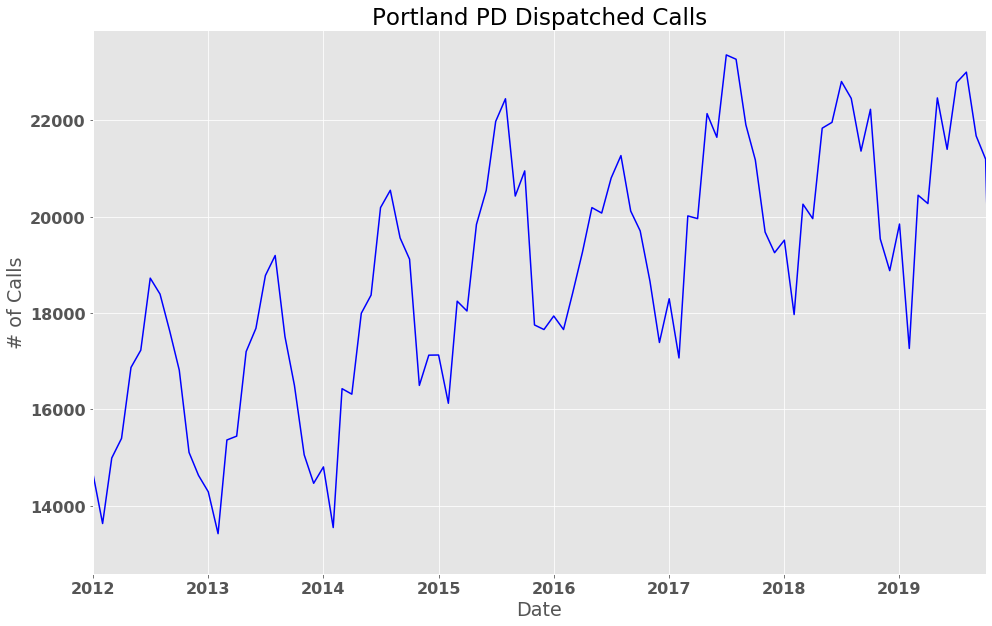

In [212]:
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)


fig, ax = plt.subplots(figsize=(16,10))
full_df_x_vals = list(df_count_by_month.index)
full_df_y_vals = list(df_count_by_month)
ax.plot(full_df_x_vals, full_df_y_vals, color='b')
ax.set_ylabel('# of Calls')
ax.set_xlabel('Date')
ax.set_xlim(min(full_df_x_vals), full_df_x_vals[-2])
ax.set_title('Portland PD Dispatched Calls')
plt.savefig('total_calls_over_time.png')

In [180]:
# Add a line of vice calls to the preceding graph:
full_date_range = date_range_of_set(df, 'ReportMonthYear')
vc = df[df['FinalCallCategory'] == 'Vice']
vcs_by_month_list = split_df_by_date(vc, full_date_range)

In [152]:
# Make a list of vice dataframes split by month
vc_counts_by_month = []
for i in range(len(vcs_by_month)):
    vc_counts_by_month.append(vcs_by_month_list[i].groupby('ReportMonthYear').count()['Priority'])
vc_counts_by_month[0][0]

182

In [185]:
# Extract call count for vice calls per month
vc_y_vals_list = [vc_counts_by_month[i][0] for i in range(len(vc_counts_by_month))]
vc_x_vals = vc['ReportMonthYear'].unique()

vc_x_vals
# vc_y_vals_list

array(['2012-01-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000',
       '2012-03-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2012-05-01T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-11-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2013-06-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2013-09-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-04-01

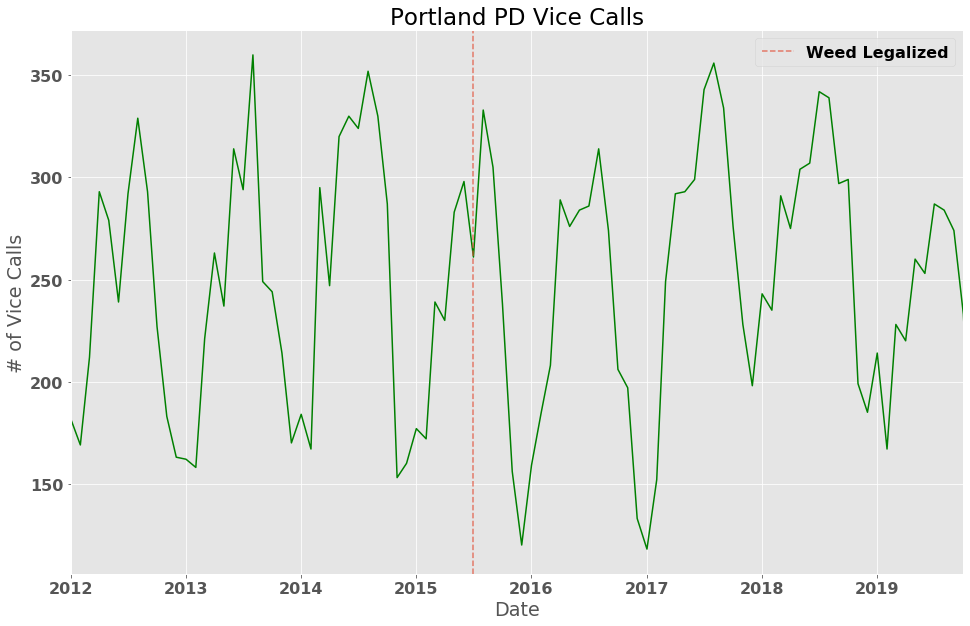

In [211]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(vc_x_vals, vc_y_vals_list, color='g')
ax.set_ylabel('# of Vice Calls')
ax.set_xlabel('Date')
ax.set_xlim(min(full_df_x_vals), full_df_x_vals[-2])
ax.set_title('Portland PD Vice Calls')
plt.axvline(x="2015-07-01", label='Weed Legalized',alpha=0.7, linestyle='--')
ax.legend()
plt.savefig('vice_calls_over_time.png')

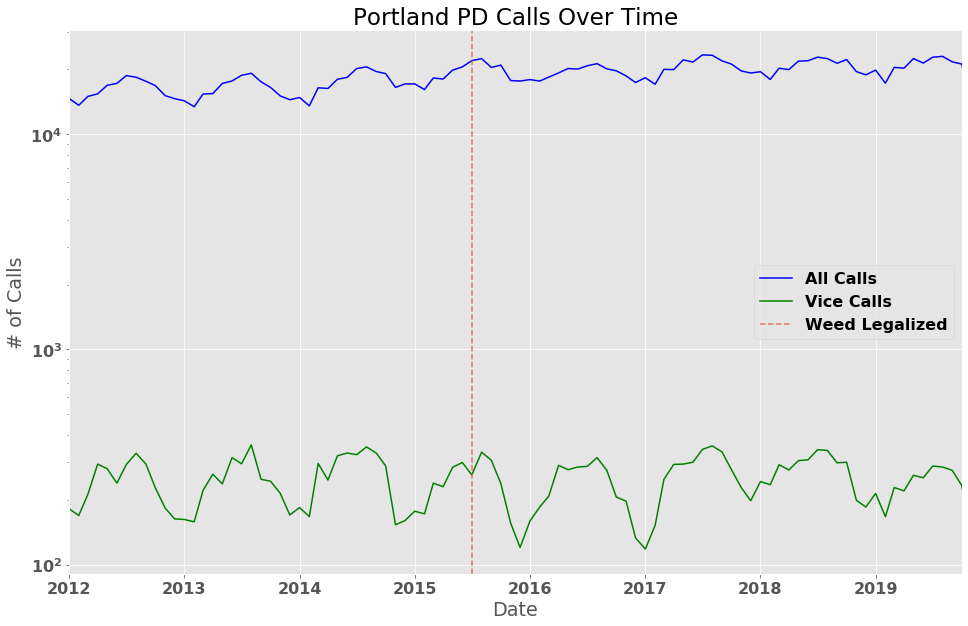

In [214]:
# Combine both graphs and add a line for weed legalization:
fig, ax = plt.subplots(figsize=(16,10))
# full count values:
ax.plot(full_df_x_vals, full_df_y_vals, label='All Calls', color='b')
# vice count values:
ax.plot(vc_x_vals, vc_y_vals_list, label='Vice Calls', color='g')
ax.set_ylabel('# of Calls')
ax.set_xlabel('Date')
ax.set_xlim(min(full_df_x_vals), full_df_x_vals[-2])
ax.set_title('Portland PD Calls Over Time')
plt.yscale('log')
plt.axvline(x="2015-07-01", label='Weed Legalized',alpha=0.7, linestyle='--')
ax.legend()
plt.savefig('combined_calls_and_weed_legal.png')